In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

DATA_PATH = "../data/heart.csv"

plt.figure(figsize=(18, 18))
%matplotlib inline

In [2]:
df = pd.read_csv(DATA_PATH)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 1.0, 'Age')

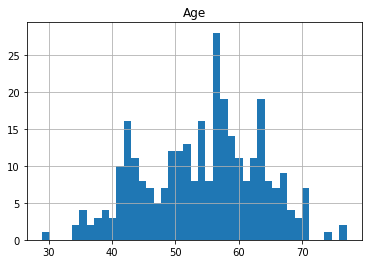

In [48]:
ages = len(df.age.value_counts())
df.age.hist(bins=ages)
plt.title("Age")

<AxesSubplot:>

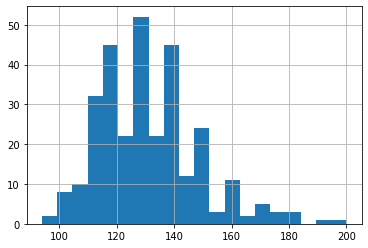

In [12]:
df.trestbps.hist(bins=20)
plt.title("Resting blood pressure (in mm Hg on admission to the hospital)")

Text(0.5, 1.0, 'Serum cholestoral in mg/dl')

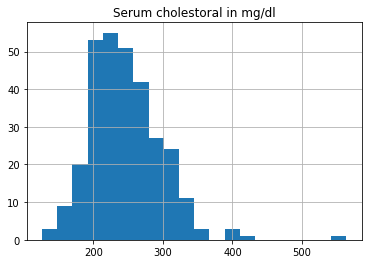

In [24]:
df.chol.hist(bins=20)
plt.title("Serum cholestoral in mg/dl")

Text(0.5, 1.0, 'Maximum heart rate achieved')

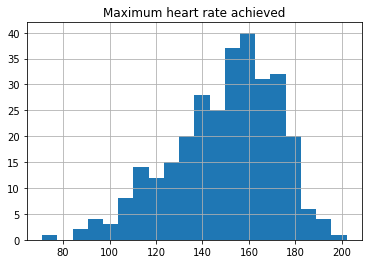

In [27]:
df.thalach.hist(bins=20)
plt.title("Maximum heart rate achieved")

Text(0.5, 1.0, 'ST depression induced by exercise relative to rest')

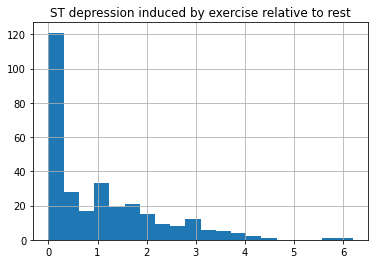

In [28]:
df.oldpeak.hist(bins=20)
plt.title("ST depression induced by exercise relative to rest")

In [30]:
df.slope.value_counts()
# plt.title("ST depression induced by exercise relative to rest")

2    142
1    140
0     21
Name: slope, dtype: int64

In [31]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [50]:
corr = df.corr()

In [51]:
sn.set(rc={'figure.figsize':(18, 10)})

ERROR! Session/line number was not unique in database. History logging moved to new session 261


<AxesSubplot:>

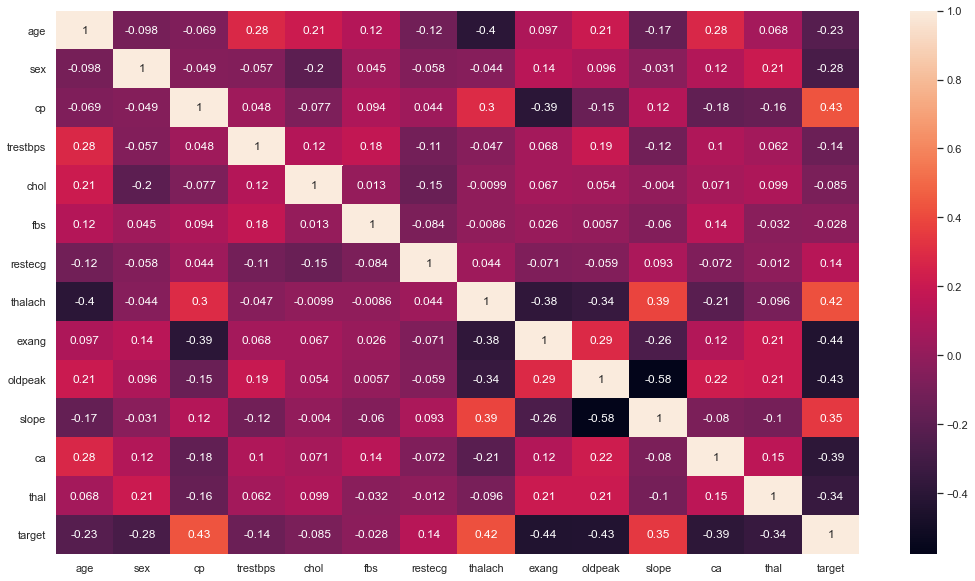

In [52]:
sn.heatmap(corr, annot=True)

# Models

## LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [54]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [55]:
TARGET = 'target'

FEATURES = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 
]

In [57]:
x = df[FEATURES]
y = df[TARGET]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=777)
x_train.shape, x_test.shape

((242, 13), (61, 13))

In [59]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
accuracy_score(y_test, logreg_model.predict(x_test))

0.8524590163934426

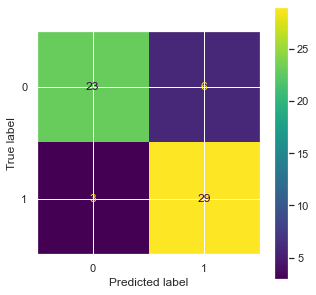

In [82]:
sn.set(rc={'figure.figsize':(5, 5)})
metrics.plot_confusion_matrix(logreg_model, x_test, y_test)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [84]:
accuracy_score(y_test, rf_model.predict(x_test))

0.8032786885245902

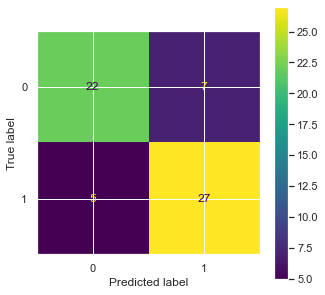

In [83]:
metrics.plot_confusion_matrix(rf_model, x_test, y_test)